<a href="https://colab.research.google.com/github/Trim0500/SOEN471-Assignment-1/blob/main/SOEN_471_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 2

# Task 1: Data Preparation and Exploration

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv('customer_churn.csv')
df.head()

,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Preferred_Content_Type,Membership_Type,Payment_Method,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Churn
0,1,56,35,62.579266,73,TV Shows,Basic,PayPal,0,7,8,0
1,2,69,15,159.714415,1,Sports,Basic,Credit Card,0,7,21,0
2,3,46,25,41.119547,36,Movies,Premium,PayPal,0,5,13,1
3,4,32,28,183.961735,35,Movies,Standard,Credit Card,0,0,27,0
4,5,60,10,87.782848,66,Movies,Standard,Bank Transfer,0,7,18,0


In [4]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Churn
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.81900,18.218000,100.794546,50.387000,0.154000,4.546000,15.268000,0.265000
std,288.819436,14.99103,10.177822,56.477606,28.224171,0.361129,2.919316,8.225317,0.441554
min,1.000000,18.00000,1.000000,5.036738,1.000000,0.000000,0.000000,1.000000,0.000000
25%,250.750000,31.00000,9.000000,50.383080,26.000000,0.000000,2.000000,9.000000,0.000000
50%,500.500000,44.00000,18.000000,100.234954,51.000000,0.000000,5.000000,15.000000,0.000000
75%,750.250000,56.00000,27.000000,150.445885,75.000000,0.000000,7.000000,22.000000,1.000000
max,1000.000000,69.00000,35.000000,199.944192,99.000000,1.000000,9.000000,29.000000,1.000000


In [60]:
missing_values = df.isnull().sum()
print(missing_values)


CustomerID                    0
Age                           0
Subscription_Length_Months    0
Watch_Time_Hours              0
Number_of_Logins              0
Preferred_Content_Type        0
Membership_Type               0
Payment_Method                0
Payment_Issues                0
Number_of_Complaints          0
Resolution_Time_Days          0
Churn                         0
dtype: int64


### It seems that there is no null  

## Bar Charts of numerical Variables

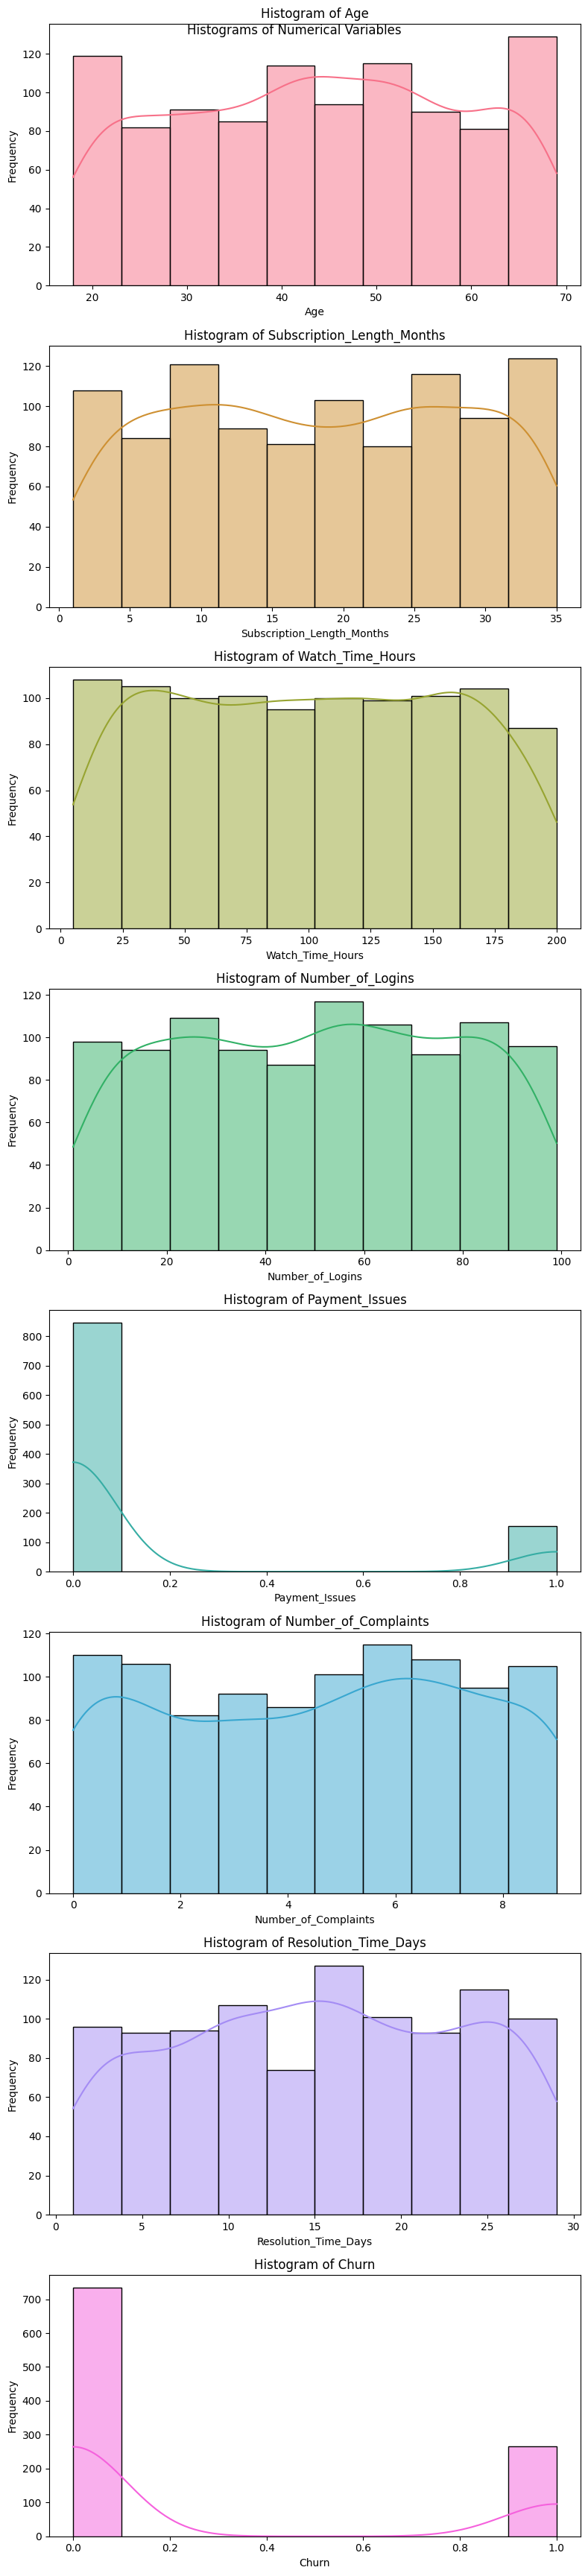

In [72]:
num_cols = df.select_dtypes(include=['number']).columns[1:]
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 35))

for ax, col in zip(axes, num_cols):
    sns.histplot(data=df, x=col, bins=10, edgecolor="black", kde=True, color=sns.color_palette("husl", len(num_cols))[num_cols.get_loc(col)], ax=ax)
    ax.set_title(f"Histogram of {col}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel(col)

plt.suptitle("Histograms of Numerical Variables")
plt.tight_layout()
plt.show()


## Bar Chart of categorical Variables

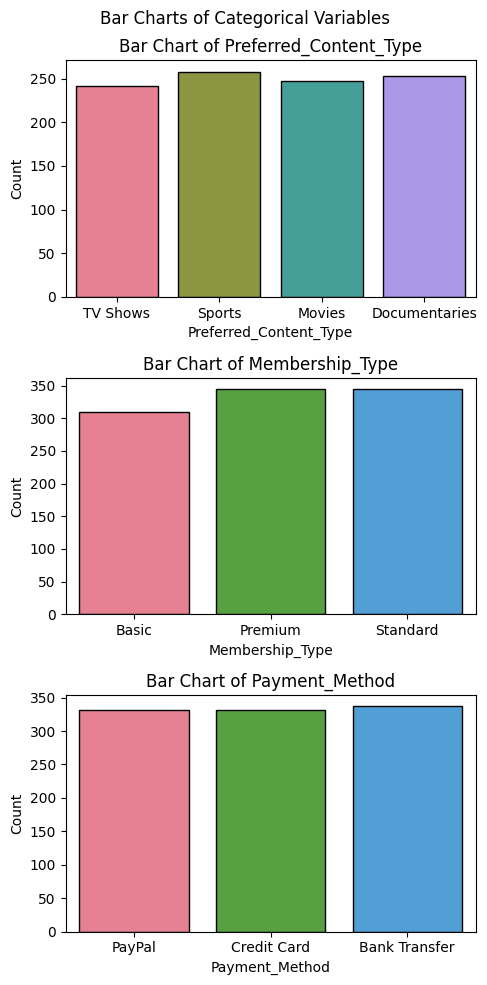

In [64]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
fig, axes = plt.subplots(nrows=len(cat_cols), figsize=(5, 10))

for ax, col in zip(axes, cat_cols):
    sns.countplot(data=df, x=col, ax=ax, edgecolor="black", hue=col, legend=False, palette="husl")

    ax.set_title(f"Bar Chart of {col}")
    ax.set_ylabel("Count")
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=0)

plt.suptitle("Bar Charts of Categorical Variables")
plt.tight_layout()
plt.show()


### Most of the features seem to be uniformly distributed

## Box plots

<ipython-input-74-ff5a8b3eb87b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Preferred_Content_Type"], y=df["Watch_Time_Hours"], palette="coolwarm")


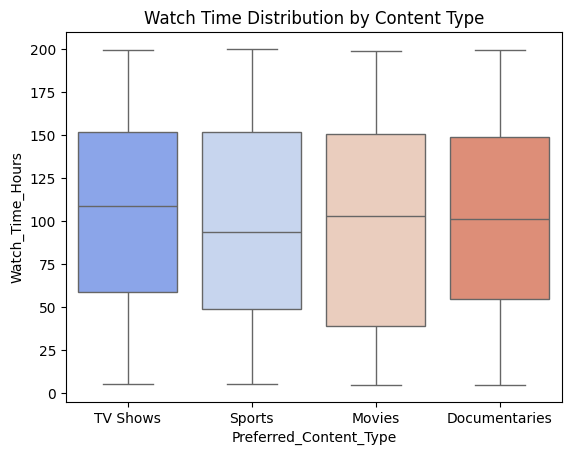

In [74]:
sns.boxplot(x=df["Preferred_Content_Type"], y=df["Watch_Time_Hours"], palette="coolwarm")
plt.title("Watch Time Distribution by Content Type")
plt.show()


<ipython-input-45-435464da2b49>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Membership_Type"], y=df["Subscription_Length_Months"], palette="coolwarm")


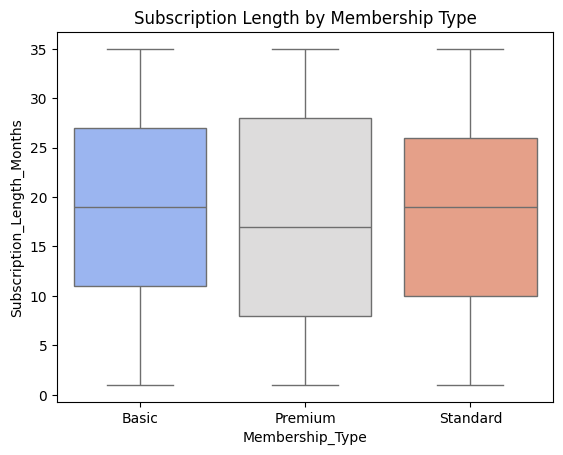

In [45]:
sns.boxplot(x=df["Membership_Type"], y=df["Subscription_Length_Months"], palette="coolwarm")
plt.title("Subscription Length by Membership Type")
plt.show()


<ipython-input-46-d2b62342027c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Payment_Method"], y=df["Resolution_Time_Days"], palette="coolwarm")


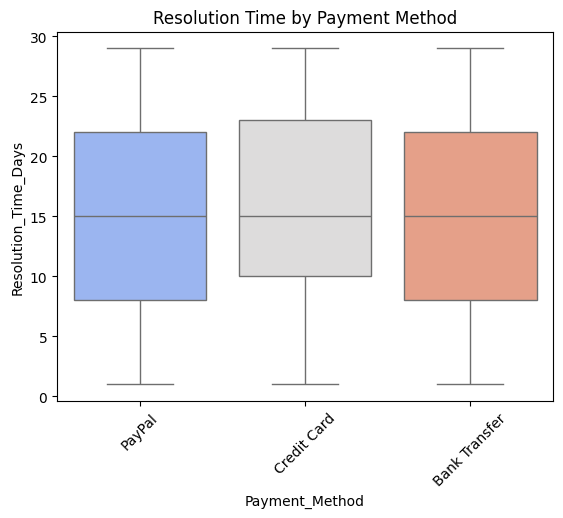

In [46]:
sns.boxplot(x=df["Payment_Method"], y=df["Resolution_Time_Days"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Resolution Time by Payment Method")
plt.show()


<ipython-input-47-a2a8444bfa6e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Churn"], y=df["Watch_Time_Hours"], palette="coolwarm")


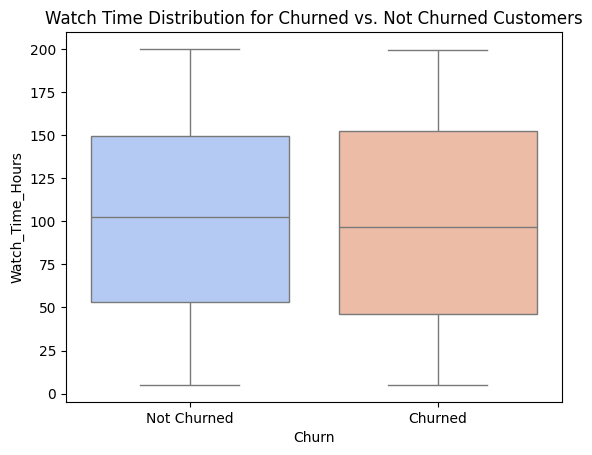

In [47]:
sns.boxplot(x=df["Churn"], y=df["Watch_Time_Hours"], palette="coolwarm")
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.title("Watch Time Distribution for Churned vs. Not Churned Customers")
plt.show()


<ipython-input-48-5c5adb82be03>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Churn"], y=df["Number_of_Logins"], palette="coolwarm")


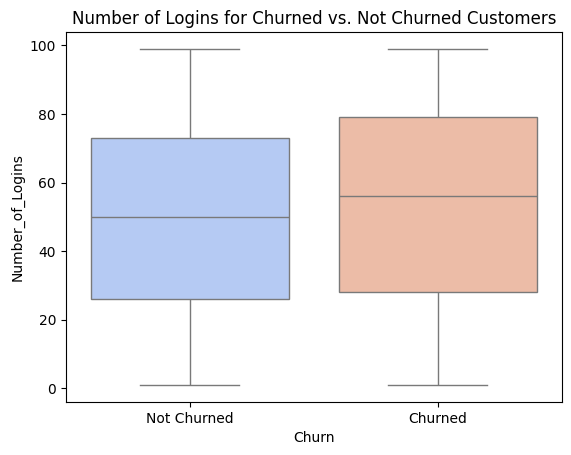

In [48]:
sns.boxplot(x=df["Churn"], y=df["Number_of_Logins"], palette="coolwarm")
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.title("Number of Logins for Churned vs. Not Churned Customers")
plt.show()


## Correlations between variables

In [58]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df.select_dtypes(include=['object', 'category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

correlation_matrix = df_encoded.corr()
print(correlation_matrix)

                            CustomerID       Age  Subscription_Length_Months  \
CustomerID                    1.000000 -0.011816                   -0.006179   
Age                          -0.011816  1.000000                   -0.018938   
Subscription_Length_Months   -0.006179 -0.018938                    1.000000   
Watch_Time_Hours              0.032126 -0.046360                    0.024732   
Number_of_Logins              0.025595  0.018846                   -0.056609   
Preferred_Content_Type       -0.039670 -0.006083                   -0.015414   
Membership_Type               0.011634 -0.007896                   -0.007250   
Payment_Method                0.063396  0.040888                    0.012030   
Payment_Issues                0.003177 -0.026649                   -0.024939   
Number_of_Complaints          0.008697  0.059649                    0.015968   
Resolution_Time_Days          0.062073 -0.001181                   -0.020476   
Churn                        -0.005506  

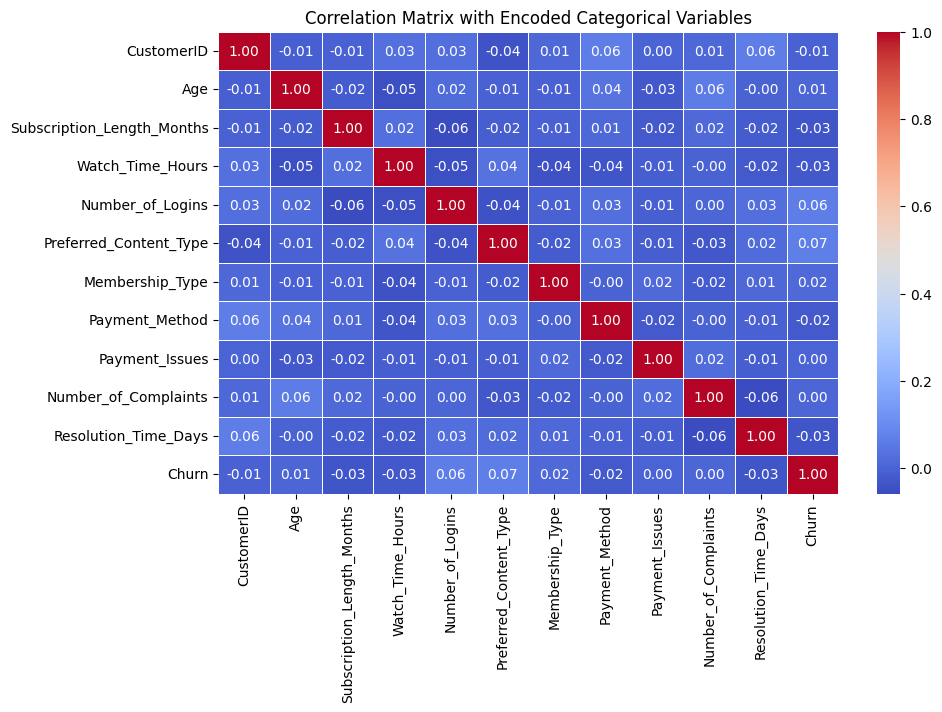

In [59]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix with Encoded Categorical Variables")
plt.show()


### There doesnt seem to be any significant linear correlation between the variables
